# Final Project Notebook

Use the follow cells prompts to complete the final project for the course. Everything you need should be present in this notebook or previous notebooks we've used in class. You can work together as needed. 

 - You will need to name your own dataset and use that name throughout
 - There are sections where you need to make changes the code and insert new code this will be noted in the code provided
 - You may get frustrated along the way, this is totally normal, just remember even small changes to the code make a huge difference. 

## Question Fork the Repository
i. Include a screenshot of the forked repo in your GitHub account

To fork the repository:
1. Go to https://github.com/NovaVolunteer/ds1001_final
2. Click the "Fork" button in the top right corner
3. The repo will be forked to your GitHub account
4. Take a screenshot of your forked repository

### You should now be able to open your cloned repo in google collab, use the code below. 

### It's very helpful to have the variable inspector open while you go through this process. To do so go to tools>command palette>show variable inspector

### It's also helpful to open up the folder tree on the left menu bar. Just click on the folder icon and then the ds1001_final folder. The data is located in the data folder in the processed sub-folder. 

In [1]:
!git clone "https://github.com/username/repository.git"
# This script clones a GitHub repository using Git command line tool. 
# Insert the path to your desired repository in place of the URL.

Cloning into 'repository'...
remote: Repository not found.
fatal: repository 'https://github.com/username/repository.git/' not found


## Systems

In [2]:
# Activate the finalproj environment
!source ds1001_final/ds1001_final/finalproj/bin/activate

/bin/bash: line 1: ds1001_final/ds1001_final/finalproj/bin/activate: No such file or directory


In [3]:
### You can use this command to list all the packages in your environment
!pip list

Package                   Version
------------------------- -----------
anyio                     4.11.0
argon2-cffi               25.1.0
argon2-cffi-bindings      25.1.0
arrow                     1.4.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.4.0
babel                     2.17.0
beautifulsoup4            4.14.2
bleach                    6.3.0
certifi                   2025.10.5
cffi                      2.0.0
charset-normalizer        3.4.4
colorama                  0.4.6
comm                      0.2.3
contourpy                 1.3.3
cycler                    0.12.1
debugpy                   1.8.17
decorator                 5.2.1
defusedxml                0.7.1
executing                 2.2.1
fairlearn                 0.13.0
fastjsonschema            2.21.2
filelock                  3.19.1
fonttools                 4.60.1
fqdn                      1.5.1
fsspec                    2025.9.0
gitdb                     4.0.12
GitPython   

In [4]:
!pip install fairlearn

#You'll likely need to install the fairlearn packages, if not already installed.
#Are there additional packages to install? (Cross check with the list above to 
# ensure all packages are installed)

### Check !pip list again to confirm installations

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import fairlearn.metrics
from fairlearn.metrics import MetricFrame
from fairlearn.metrics import count, true_positive_rate, false_positive_rate, selection_rate, demographic_parity_ratio


## Design: Data prep and exploration 

In [6]:
sign_ups = pd.read_csv('/workspaces/ds1001_final/ds1001_final/data/processed/bank_final.csv') # the data is the data folder, 
#you'll need to use the correct path to the dataset. 

# How many rows are in the dataframe? 43628 How many columns? 13

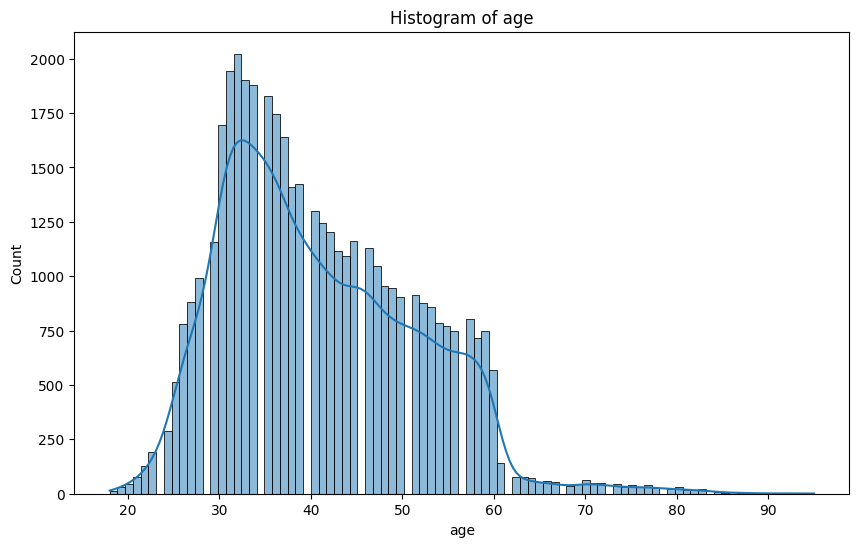

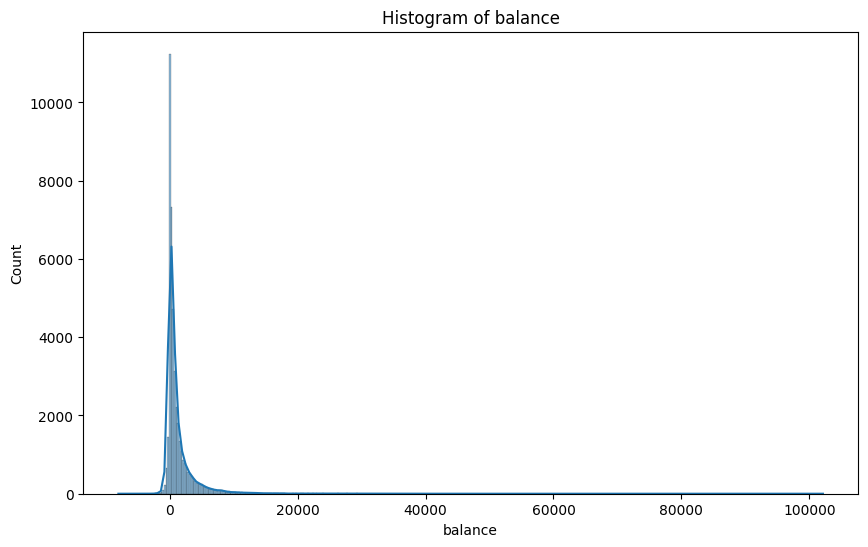

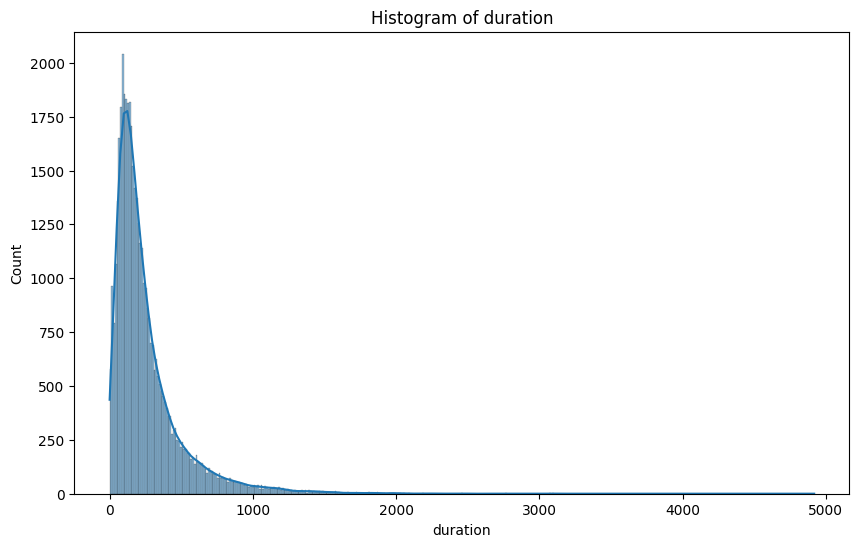

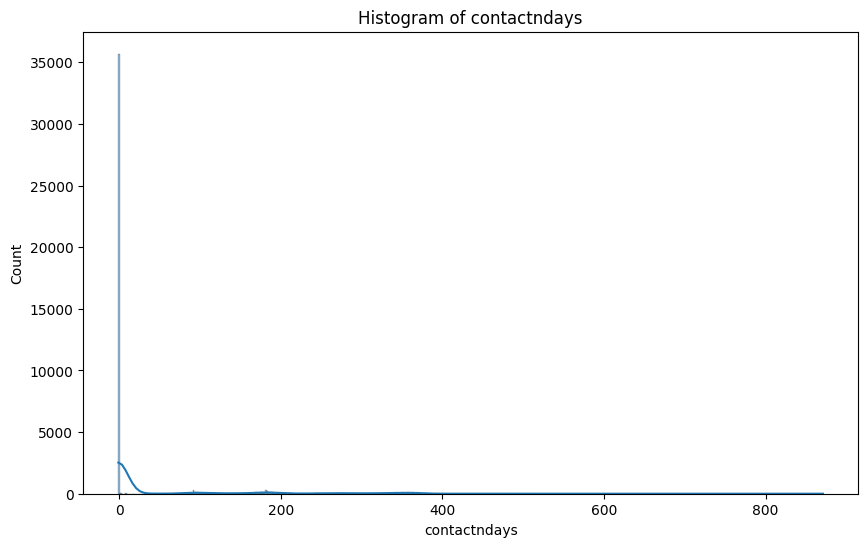

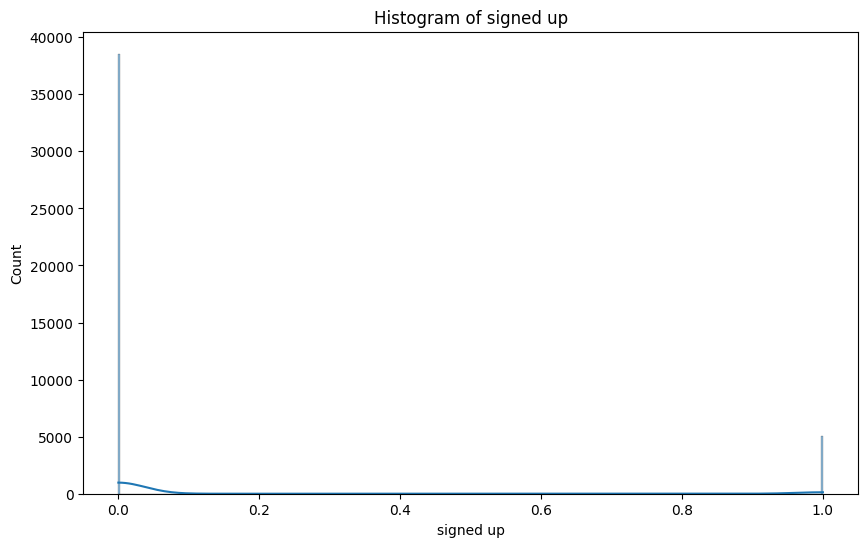

In [7]:
# Explore the variables a bit more, create histograms for the numerics values and bar charts for the categorical.
# Histograms for numeric variables
numeric_columns = sign_ups.select_dtypes(include=['number']).columns
for col in numeric_columns: 
    plt.figure(figsize=(10, 6))
    sns.histplot(sign_ups[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.show()  



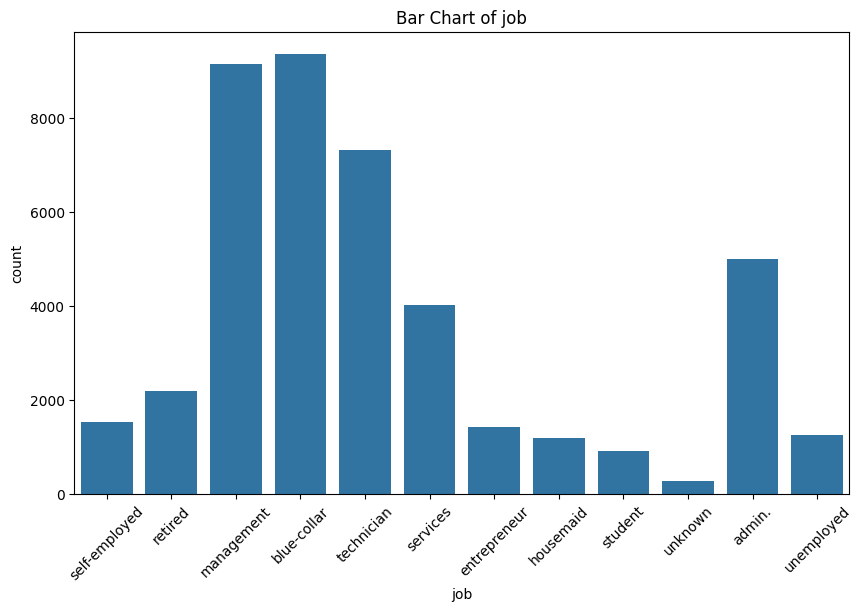

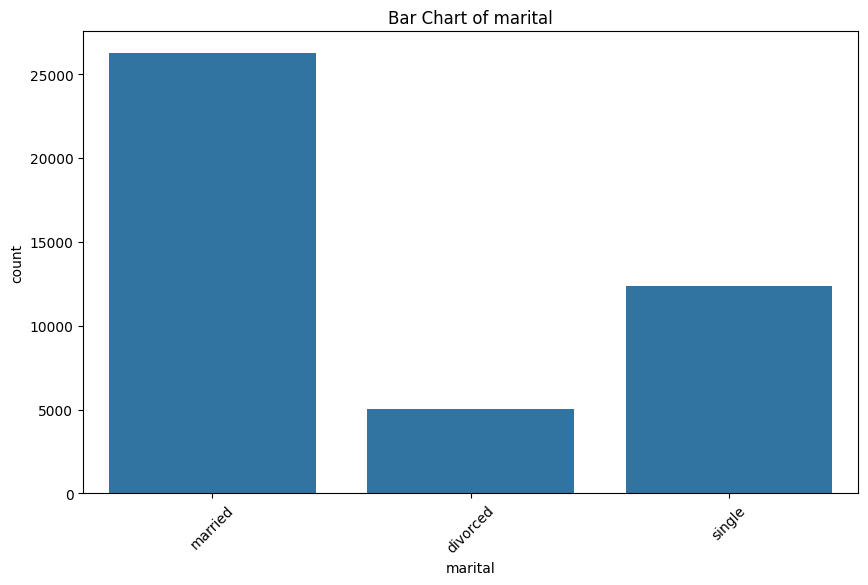

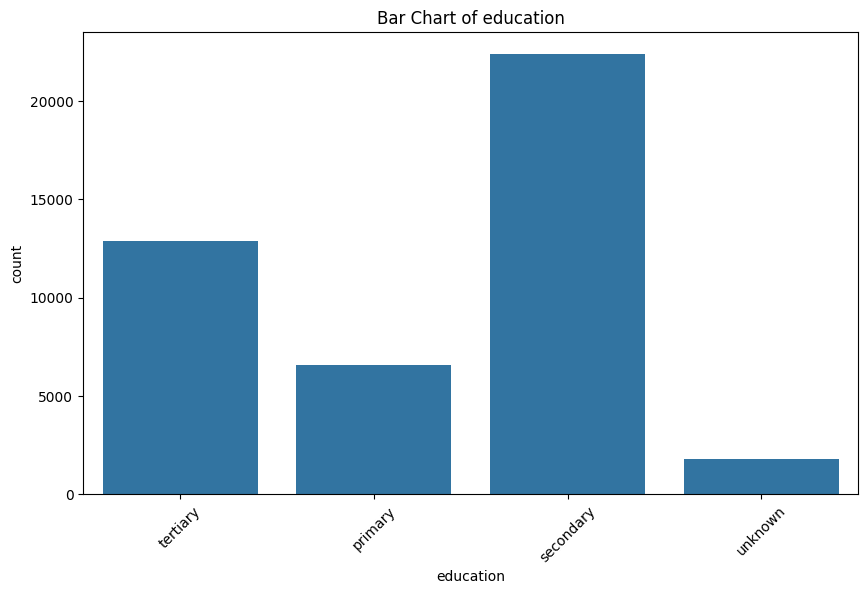

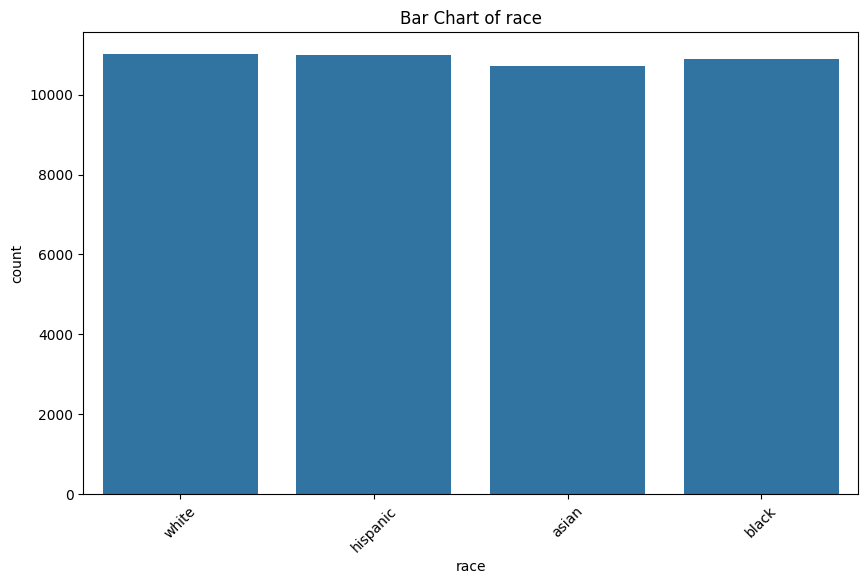

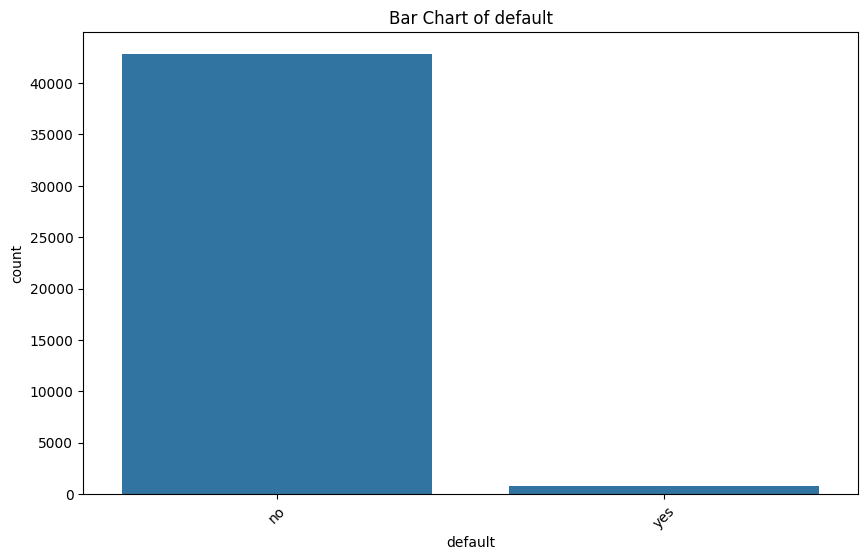

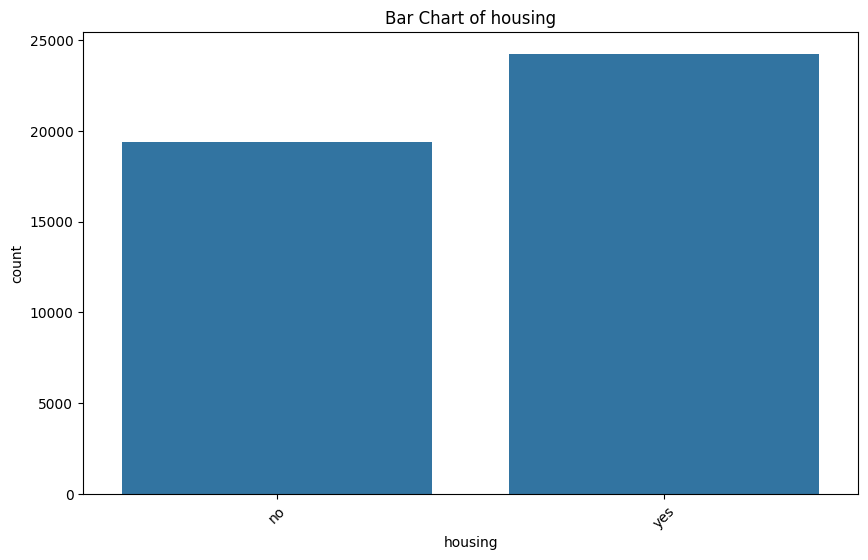

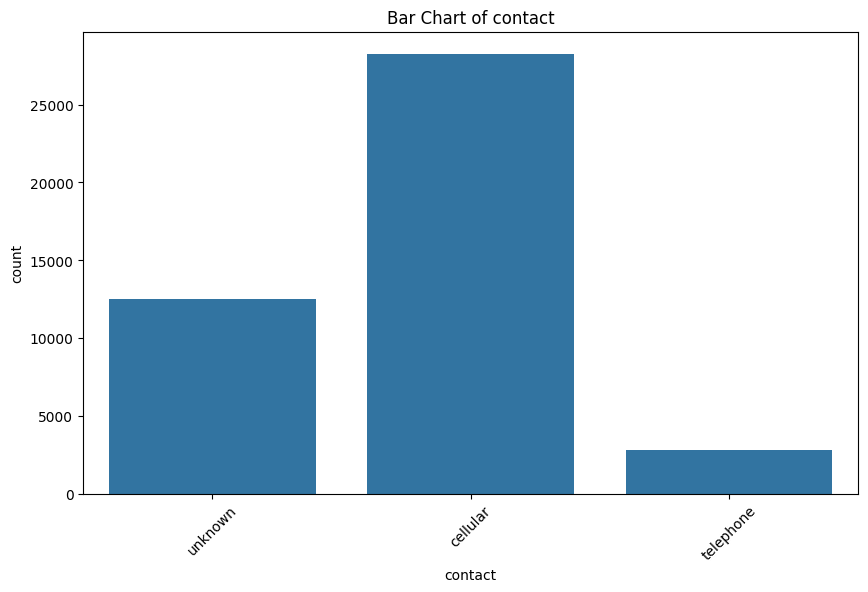

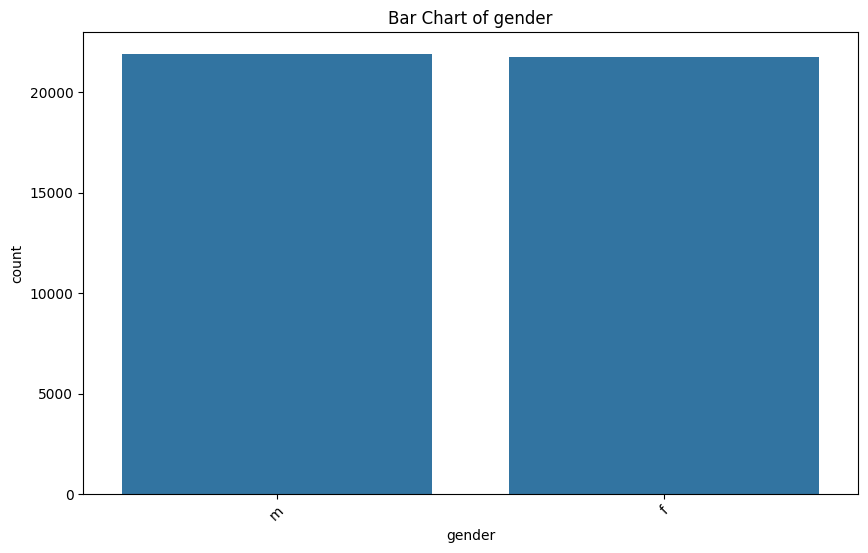

In [8]:
# Bar charts for categorical variables
categorical_columns = sign_ups.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=sign_ups[col])
    plt.title(f'Bar Chart of {col}')
    plt.xticks(rotation=45)
    plt.show()

In [9]:
# How many numeric columns are in the data set? 5
num_numeric_columns = sign_ups.select_dtypes(include=['number']).shape[1]

In [10]:
# Normalization
scaler = MinMaxScaler()
sign_ups[sign_ups.select_dtypes(include=['number']).columns] = scaler.fit_transform(sign_ups.select_dtypes(include=['number']))

In [11]:
# Likely need to convert categorical columns to category dtype
for col in sign_ups.select_dtypes(include=['object']).columns:
    sign_ups[col] = sign_ups[col].astype('category')   

In [12]:
# Creating dummy variables, make sure the variables that need to be converted to dummies are categorical, not numeric.
# This might require you to convert some columns to categorical first using astype('category')
sign_ups = pd.get_dummies(sign_ups, drop_first=True)

In [13]:
# Display missing data using the isnull function, is there any missing data?
print(sign_ups.isnull().sum())

age                    0
balance                0
duration               0
contactndays           0
signed up              0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
race_black             0
race_hispanic          0
race_white             0
default_yes            0
housing_yes            0
contact_telephone      0
contact_unknown        0
gender_m               0
dtype: int64


In [14]:
# remove missing values if needed
sign_ups = sign_ups.dropna()

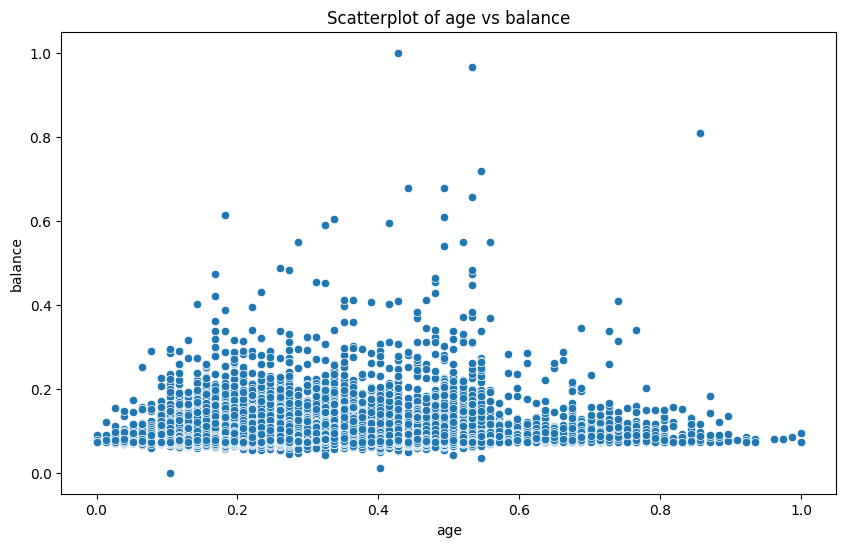

In [15]:
# Scatterplot between two continuous variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=sign_ups)  # Replace 'Variable1' and 'Variable2' with your column names
plt.title('Scatterplot of age vs balance')
plt.savefig('scatterplot.png')  # Save the scatterplot image
plt.show()

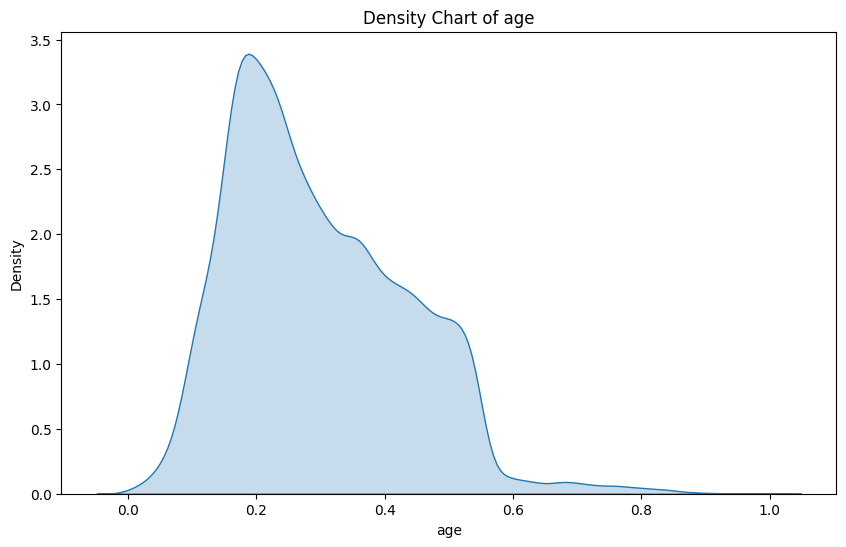

In [16]:
# Density chart of a continuous variable
plt.figure(figsize=(10, 6))
sns.kdeplot(sign_ups['age'], fill=True)  # Replace 'ContinuousVariable' with your column name
plt.title('Density Chart of age')
plt.show()

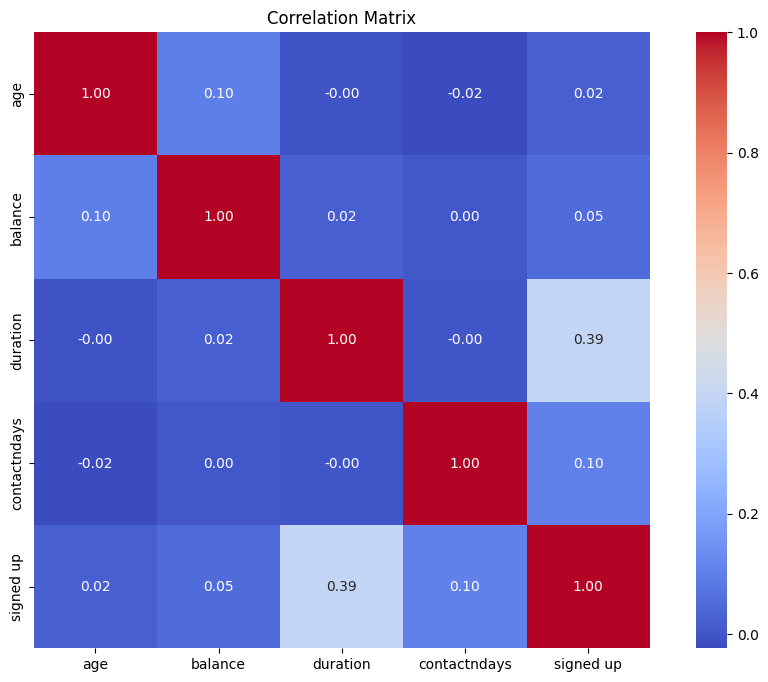

In [17]:
#Correlation matrix, make sure to only include numeric variables
num_values = sign_ups.select_dtypes(include=['number'])
correlation_matrix = num_values.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## Analytics: Build a model and Tune it for best Best Performance

In [18]:
# What is the ‘target’ of a model and what is the prevalence of the target in your dataset? Remember prevalence 
# is the proportion of records that take on the value of interest for the target variable, usually the positive class.
target_prevalence = sign_ups['signed up'].sum()  # Replace 'TargetVariable' with your target column name
print(f'Target Prevalence: {target_prevalence}')

Target Prevalence: 5074.0


In [19]:
# Divide the dataset into features and target
target = sign_ups['signed up']  # Replace 'TargetVariable' with your actual target column name and sign_ups with your dataframe name
features = sign_ups.drop(columns=['signed up']) # Drop the target column from features


In [20]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [21]:
# Include your table for the 10 values of k you tried and the corresponding accuracies.

accuracy_results = {}

# Replace x with your desired range values, explain what is happening in this loop
for k in range(3, 13):  
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    accuracy = knn_model.score(X_test, y_test)
    accuracy_results[k] = accuracy

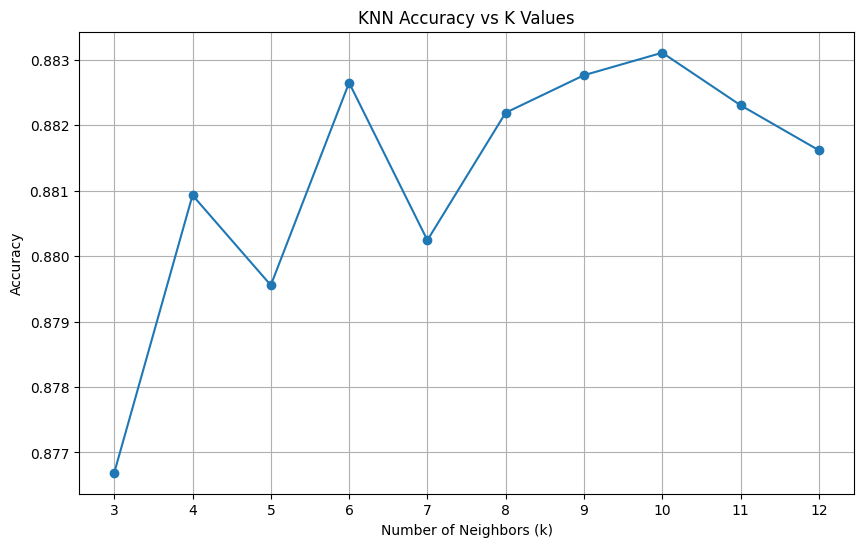

In [22]:
#graph of accuracy vs k values
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_results.keys()), list(accuracy_results.values()), marker='o')
plt.title('KNN Accuracy vs K Values')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(list(accuracy_results.keys()))
plt.grid()
plt.show()

In [ ]:
# using the hyperparameter k that gave the best accuracy, rerun the model and generate 
# predictions on the test set. Explain why you choose this k value.
best_k = 6  # Replace 'xx' with the best k value found
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)  

## Value: Evaluation and Protected Classes

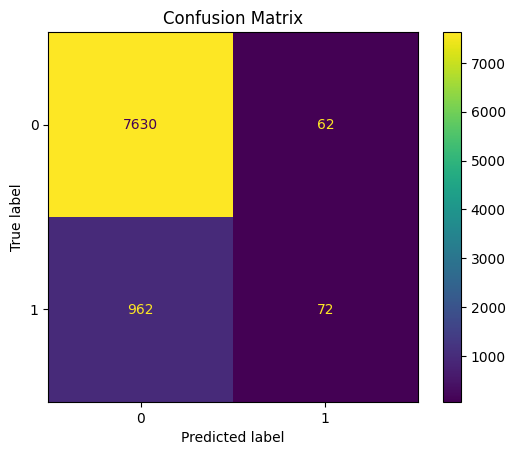

In [ ]:
# create a confusion matrix for your model's predictions. 
# What does the confusion matrix tell you about your model's performance?
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#We already have a model above using KNN so we can use the results to compute fairness metrics

# Compute fairness metrics using Fairlearn

my_metrics = {
    'true positive rate' : true_positive_rate,
    'false positive rate' : false_positive_rate,
    'selection rate' : selection_rate,
    'count' : count
}
# Construct a MetricFrame for race
mf_race = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test['race_white']  # Replace with your first protected class
)

# Construct a MetricFrame for gender
mf_gender = MetricFrame(
    metrics=my_metrics,
    y_true=y_test,
    y_pred=y_pred,
    sensitive_features=X_test['gender_m']  # Replace second protected class 
)  


In [ ]:
mf_race.by_group #What do the results show? Change the mf_race with each subgroup and report the findings. This means
# you should run this cell multiple times, once for each of the levels in the race variable.

,true positive rate,false positive rate,selection rate,count
race_white,,,,
False,0.077128,0.008343,0.016295,6505.0
True,0.049645,0.007220,0.012607,2221.0


In [ ]:
mf_gender.by_group #What do the results show? There's only two groups here so we don't need to change anything. 
# in the metric frame.

,true positive rate,false positive rate,selection rate,count
gender_m,,,,
False,0.068468,0.008166,0.015858,4351.0
True,0.070981,0.007957,0.014857,4375.0


In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# two fairness ratios using the gender_m feature, which is bi-variate. What do the results show, is the model more or 
# less fair with this grouping?

dpr_gender = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Demographic Parity ratio:\t", dpr_gender)

eodds_gender = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test['gender_m'])
print("Equalized Odds ratio:\t\t", eodds_gender)

Demographic Parity ratio:	 0.9368612836438923
Equalized Odds ratio:		 0.9645998940116586


In [ ]:
# Derived fairness metrics. Be sure you understand the scale and meaning of these. Here we are calculating the 
# the same features above only using a filtered search to pull in all the possibilities of features
# starting with "race". What do the results show, is the model more or less fair with this grouping?

dpr_race = fairlearn.metrics.demographic_parity_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Demographic Parity ratio:\t", dpr_race)

eodds_race = fairlearn.metrics.equalized_odds_ratio(y_test, y_pred, sensitive_features=X_test.filter(regex="race.*"))
print("Equalized Odds ratio:\t\t", eodds_race)

Demographic Parity ratio:	 0.6943511238873687
Equalized Odds ratio:		 0.5484633569739953


In [ ]:
#Optional code to add, commit, and push changes to your GitHub repository
!git add .
!git commit -m "Joshua Nieman, done" # This will commit your changes to git. 
!git push # This will push your changes to back to your remote repository on GitHub.

[main 5350340] Joshua Nieman, done
 1 file changed, 21 insertions(+), 2 deletions(-)
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 2 threads
Compressing objects: 100% (4/4), done.
Writing objects: 100% (5/5), 860 bytes | 860.00 KiB/s, done.
Total 5 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/joshbadprogrammer/ds1001_final
   552a85c..5350340  main -> main
